In [2]:
# Data Manipulation
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations

# Data Visualization
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns            # For statistical data visualization

# Clustering Algorithms
from sklearn.cluster import KMeans         # For K-means clustering
from sklearn.cluster import AgglomerativeClustering  # For hierarchical clustering
from sklearn.cluster import SpectralClustering      # For spectral clustering
from sklearn.mixture import GaussianMixture        # For Gaussian Mixture Models

# Model Evaluation
from sklearn.metrics import silhouette_score  # To evaluate the quality of clusters
from sklearn.metrics import pairwise_distances_argmin_min  # To find closest points to cluster centers

# Data Preprocessing
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.decomposition import PCA              # For dimensionality reduction if needed

# Additional Libraries (if needed)
import scipy.cluster.hierarchy as sch  # For hierarchical clustering and dendrograms


## Data Ingestion & Initial Checks

In [6]:
df = pd.read_csv('./Dataset/bank_marketing.csv')

In [10]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [14]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

no null values

## Exploratory Data Analysis

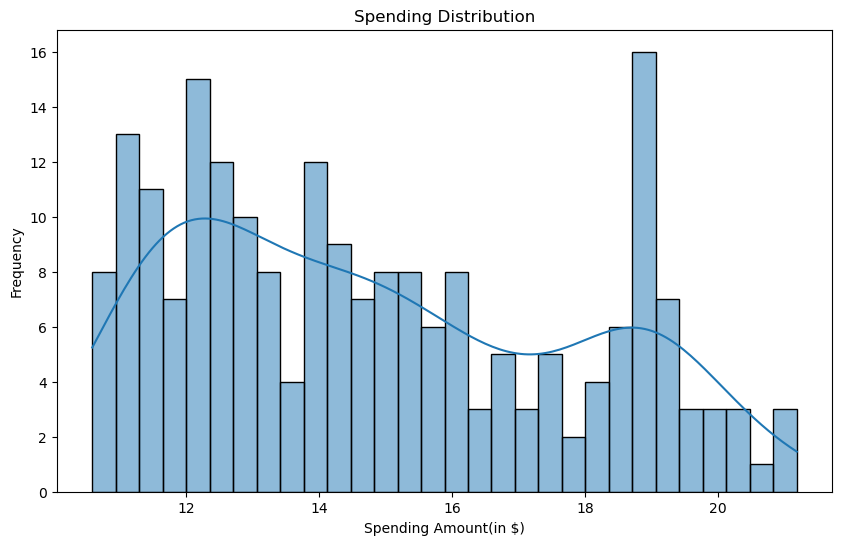

In [23]:
# Transaction Patterns

# Plotting spending distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['spending'], bins=30, kde=True)
plt.title('Spending Distribution')
plt.xlabel('Spending Amount(in $)')
plt.ylabel('Frequency')
plt.show()


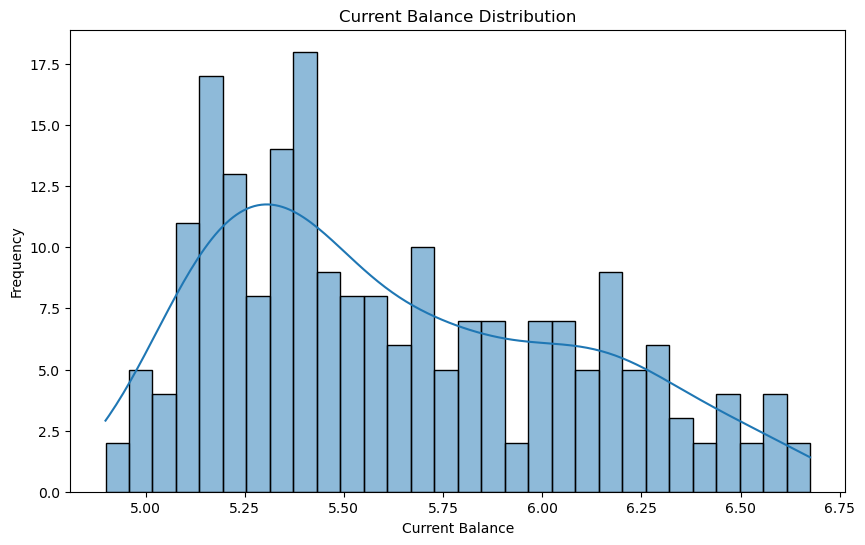

In [21]:
# Account Balance Distribution

plt.figure(figsize=(10, 6))
sns.histplot(df['current_balance'], bins=30, kde=True)
plt.title('Current Balance Distribution')
plt.xlabel('Current Balance')
plt.ylabel('Frequency')
plt.show()

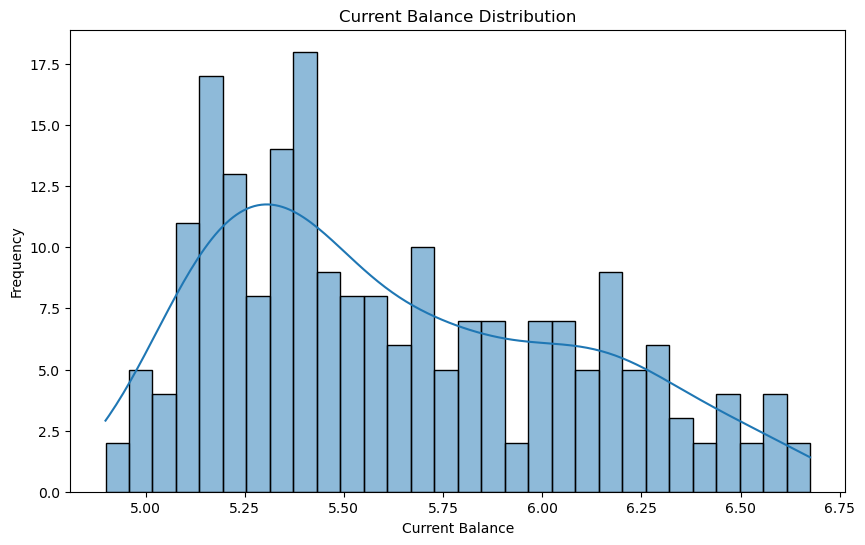

In [25]:
# Account Balance Distribution

plt.figure(figsize=(10, 6))
sns.histplot(df['current_balance'], bins=30, kde=True)
plt.title('Current Balance Distribution')
plt.xlabel('Current Balance')
plt.ylabel('Frequency')
plt.show()

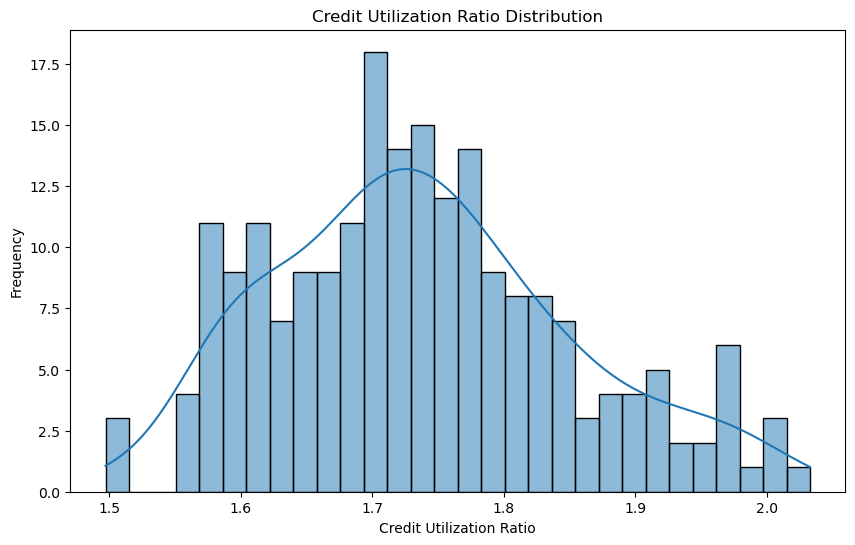

In [27]:
# Credit Utilization Ratios

# Calculate credit utilization ratio
df['credit_utilization'] = df['current_balance'] / df['credit_limit']

plt.figure(figsize=(10, 6))
sns.histplot(df['credit_utilization'], bins=30, kde=True)
plt.title('Credit Utilization Ratio Distribution')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Frequency')
plt.show()

##### Correlation Analysis


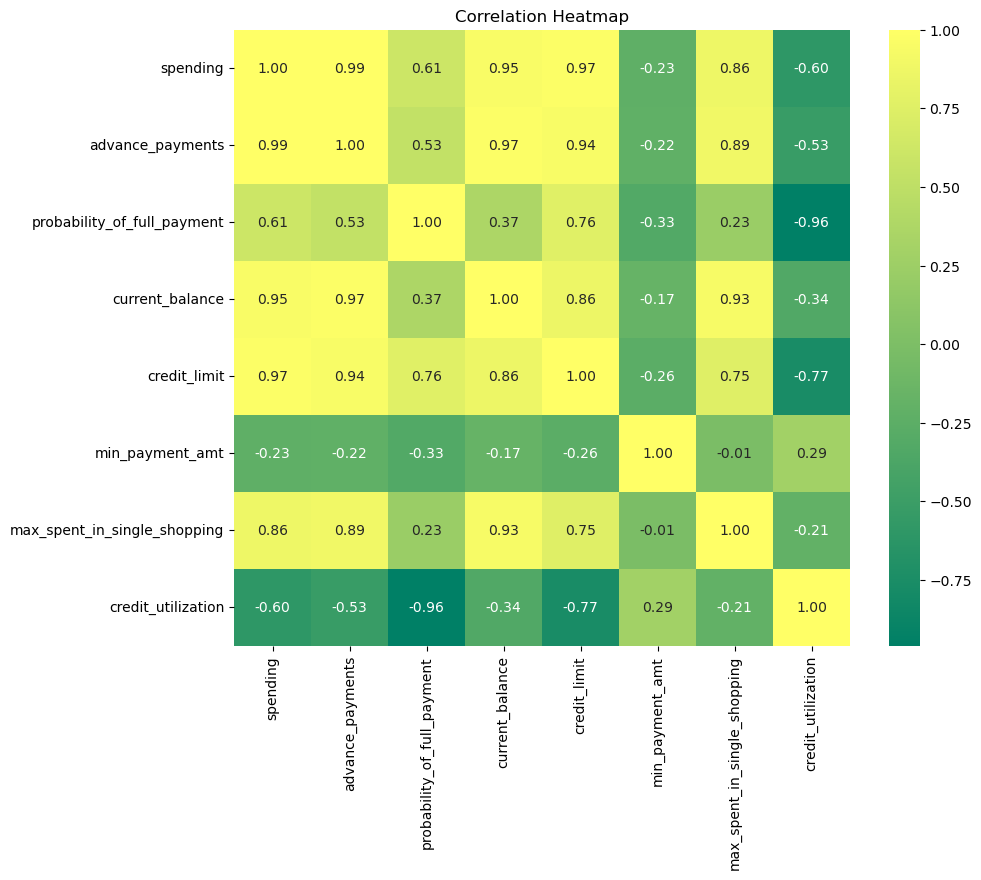

In [52]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap for correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='summer', square=True, )
plt.title('Correlation Heatmap')
plt.show()

##### Outlier Detection with Boxplots

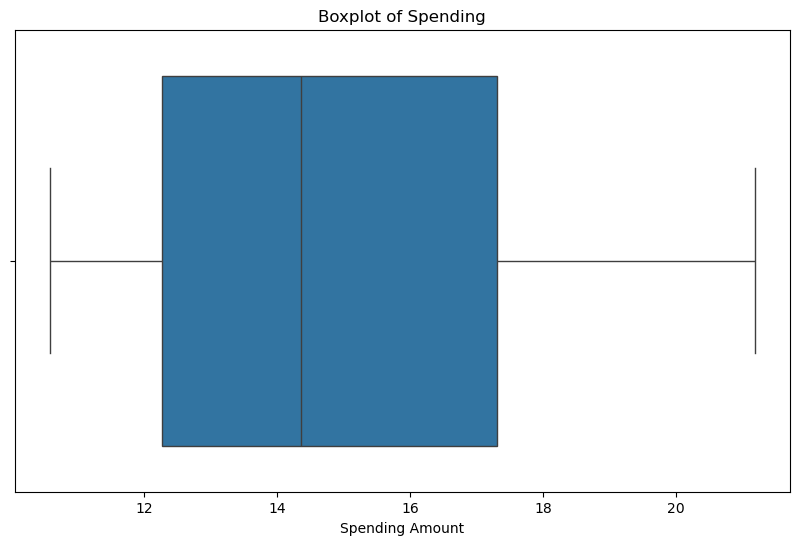

In [34]:
# Boxplot for outlier detection in spending
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['spending'])
plt.title('Boxplot of Spending')
plt.xlabel('Spending Amount')
plt.show()


In [ ]:
# Scaling the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)